# Problem Statement

Leverage guest data and Booking Behaviour Patterns to devise a strategy for Hotel Revenue Management, using Data Science and Machine Learning.

## Data Source

- Available on Kaggle
- The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis   Nunes for Data in Brief, Volume 22, February 2019.

### Some Definations: Types of given Datapoints

- Market Segments : online vs offline sources from where the booking is generated and related variables
- Hotel and Revenue : city or resort hotel, etc
- Customer Related : Variables describing the type of customer based on stay, whether returning, accompanied by how many, etc
- Cancellation History : Has there been cancellations made earlier? etc

In [1]:
# Expectation: Come up with ML model which will help us to identify which customes are likely to cancel
# Requirement: Out of all the bookings,identify a group of bookings within which translation rate is higher

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the Data for ML Project

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.shape

(119390, 33)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,Jul-15,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,Jul-15,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,Jul-15,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,Jul-15,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,Jul-15,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_month_year                 object
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

# Setting Display options to ensure feature name visibility

In [7]:
#pd.set_option('display.max_columns',None)  #to make sure display doesn't show any warnings thrown at us

# Defining Target and Independent Features

In [8]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [9]:
Y=df[['is_canceled']]

X=df.drop(['is_canceled'],axis=1)

In [10]:
Y

,is_canceled
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [11]:
X

,hotel,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,Jul-15,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,Resort Hotel,737,Jul-15,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,Resort Hotel,7,Jul-15,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,Resort Hotel,13,Jul-15,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,Resort Hotel,14,Jul-15,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,Aug-17,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,102,Aug-17,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,34,Aug-17,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,109,Aug-17,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017


# Get the Cancellation Rate

In [12]:
Y.mean()

is_canceled    0.370416
dtype: float64

37% is the rate of cancellation, ie 37% bookings are not translating into customers(they are getting dropped)

# Split features into Numerical and Categorical

In [13]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [14]:
num.dtypes

lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
company                           float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [15]:
num.shape

(119390, 19)

In [16]:
char.dtypes

hotel                      object
arrival_month_year         object
arrival_date_month         object
meal                       object
country                    object
market_segment             object
distribution_channel       object
reserved_room_type         object
assigned_room_type         object
deposit_type               object
customer_type              object
reservation_status         object
reservation_status_date    object
dtype: object

In [17]:
char.shape

(119390, 13)

In [18]:
# Counting unique values in numerical features

def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts

,0
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14
children,5
babies,5
is_repeated_guest,2


In [19]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17


In [20]:
# slicing columns with feature_levels < 20 (since less unique values, hence can be put to categorical category

slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index    #making index of cat_list as the sliced rows of slice1
cat=num.loc[:,cat_list]
cat.dtypes

arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [21]:
# slicing columns with feature_levels > 20 to numerical

slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_week_nights                int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
company                           float64
days_in_waiting_list                int64
adr                               float64
dtype: object

In [22]:
# adding cat object to char
char=pd.concat([char,cat],axis=1,join="inner")

In [23]:
char.head()

,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,reservation_status_date,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,Jul-15,July,BB,PRT,Direct,Direct,C,C,No Deposit,...,01-07-2015,2015,0,2,0.0,0,0,0,0,0
1,Resort Hotel,Jul-15,July,BB,PRT,Direct,Direct,C,C,No Deposit,...,01-07-2015,2015,0,2,0.0,0,0,0,0,0
2,Resort Hotel,Jul-15,July,BB,GBR,Direct,Direct,A,C,No Deposit,...,02-07-2015,2015,0,1,0.0,0,0,0,0,0
3,Resort Hotel,Jul-15,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,02-07-2015,2015,0,1,0.0,0,0,0,0,0
4,Resort Hotel,Jul-15,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,03-07-2015,2015,0,2,0.0,0,0,0,0,1


In [24]:
num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,3,NaN,NaN,0,0.0
1,737,27,1,0,0,4,NaN,NaN,0,0.0
2,7,27,1,1,0,0,NaN,NaN,0,75.0
3,13,27,1,1,0,0,304.0,NaN,0,75.0
4,14,27,1,2,0,0,240.0,NaN,0,98.0


# Outlier Analysis of Numerical Features

In [25]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,2.500302,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122
std,106.863097,13.605138,8.780829,1.908286,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000


# Capping and Flooring of outliers

In [26]:
# function to make min = 1% and max = 99%
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [27]:
num=num.apply(lambda x : outlier_cap(x))

In [28]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,103.409180,27.173943,15.798241,2.479211,0.060273,0.209574,86.008598,189.206373,1.606902,101.461251
std,104.600923,13.588582,8.780829,1.761267,0.376351,0.555245,108.591334,131.297172,9.760268,46.905036
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000


# Missing Value Analysis

In [29]:
num.isnull().mean()

lead_time                         0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
company                           0.943069
days_in_waiting_list              0.000000
adr                               0.000000
dtype: float64

Here, agent and company feature have 13.68% and 94.3% missing values

In [30]:
char.isnull().mean()

hotel                          0.000000
arrival_month_year             0.000000
arrival_date_month             0.000000
meal                           0.000000
country                        0.004087
market_segment                 0.000000
distribution_channel           0.000000
reserved_room_type             0.000000
assigned_room_type             0.000000
deposit_type                   0.000000
customer_type                  0.000000
reservation_status             0.000000
reservation_status_date        0.000000
arrival_date_year              0.000000
stays_in_weekend_nights        0.000000
adults                         0.000000
children                       0.000034
babies                         0.000000
is_repeated_guest              0.000000
previous_cancellations         0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
dtype: float64

# Dropping variables that have >25% missing values

In [31]:
num = num.loc[:, num.isnull().mean() <= .25]

In [32]:
num.isnull().mean()

lead_time                         0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
days_in_waiting_list              0.000000
adr                               0.000000
dtype: float64

# Imputation of missing values 

In [33]:
#Replacing missing values by mean

from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(missing_values = np.nan, strategy='mean')
num1 = pd.DataFrame(imputer.fit_transform(num), index=num.index, columns=num.columns)

In [34]:
num1.isnull().mean()

lead_time                         0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_week_nights              0.0
previous_bookings_not_canceled    0.0
booking_changes                   0.0
agent                             0.0
days_in_waiting_list              0.0
adr                               0.0
dtype: float64

In [35]:
#Replacing missing values by mode

from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(missing_values = np.nan, strategy='most_frequent')
char1 = pd.DataFrame(imputer.fit_transform(char), index=char.index, columns=char.columns)

In [36]:
char1.isnull().mean()

hotel                          0.0
arrival_month_year             0.0
arrival_date_month             0.0
meal                           0.0
country                        0.0
market_segment                 0.0
distribution_channel           0.0
reserved_room_type             0.0
assigned_room_type             0.0
deposit_type                   0.0
customer_type                  0.0
reservation_status             0.0
reservation_status_date        0.0
arrival_date_year              0.0
stays_in_weekend_nights        0.0
adults                         0.0
children                       0.0
babies                         0.0
is_repeated_guest              0.0
previous_cancellations         0.0
required_car_parking_spaces    0.0
total_of_special_requests      0.0
dtype: float64

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [37]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)   #Feature selector that removes all low-variance features
varselector.fit_transform(num1)
 
# Getting columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num2 = num1.iloc[:,cols]

In [38]:
num2.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,342.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
1,444.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
2,7.0,27.0,1.0,1.0,0.0,0.0,86.008598,0.0,75.0
3,13.0,27.0,1.0,1.0,0.0,0.0,304.000000,0.0,75.0
4,14.0,27.0,1.0,2.0,0.0,0.0,240.000000,0.0,98.0


In [39]:
num2.iloc[0]

lead_time                         342.000000
arrival_date_week_number           27.000000
arrival_date_day_of_month           1.000000
stays_in_week_nights                0.000000
previous_bookings_not_canceled      0.000000
booking_changes                     3.000000
agent                              86.008598
days_in_waiting_list                0.000000
adr                                 0.000000
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [40]:
#Discretize all the features into 10 bins, with each bin occupying 10% of the data

from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num2),index=num2.index, columns=num2.columns).add_suffix('_Rank')
num_binned.head()

,lead_time_Rank,arrival_date_week_number_Rank,arrival_date_day_of_month_Rank,stays_in_week_nights_Rank,previous_bookings_not_canceled_Rank,booking_changes_Rank,agent_Rank,days_in_waiting_list_Rank,adr_Rank
0,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
2,1.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
3,2.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0
4,2.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,5.0


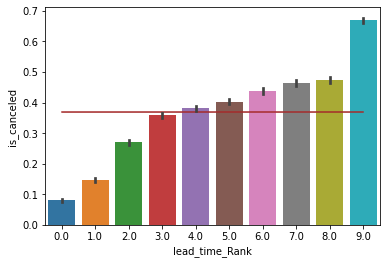

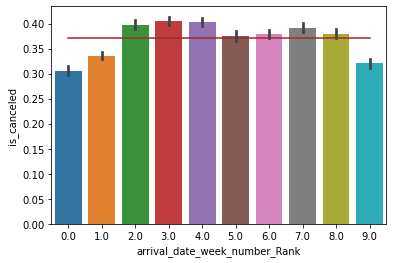

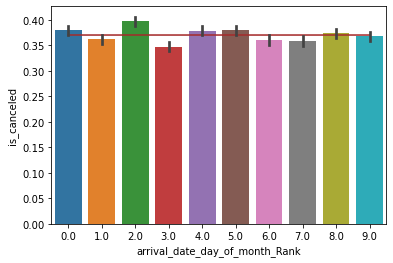

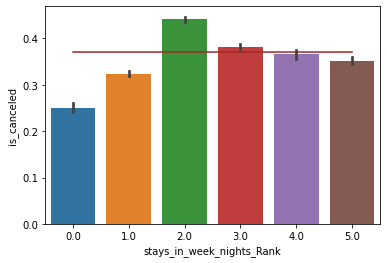

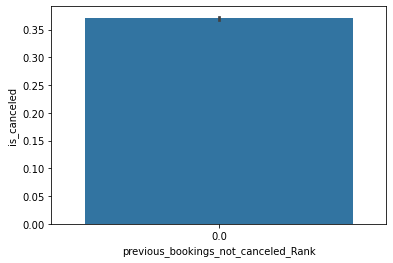

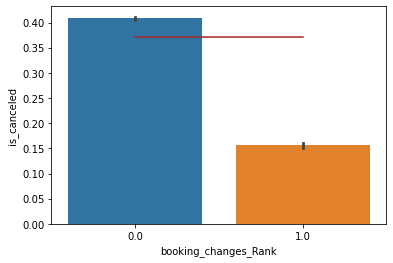

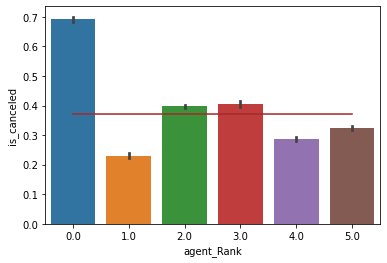

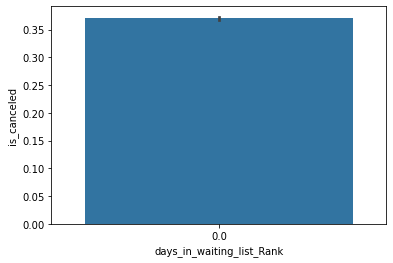

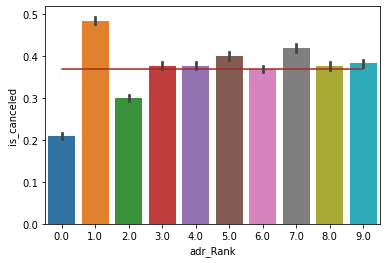

In [41]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor


X_bin_combined = pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['is_canceled'].mean(),data=X_bin_combined, color = 'brown')
    sns.barplot(x=col, y="is_canceled",data=X_bin_combined, estimator=mean )
plt.show()

In [42]:
# Check the descriptive statistics for the following features:
# previous_bookings_not_canceled
# days_in_waiting_list
# booking_changes

num2['previous_bookings_not_canceled_ind']=np.where(num2["previous_bookings_not_canceled"]>0,1,0)
num2['day_wait_ind']=np.where(num2["days_in_waiting_list"]>0,1,0)
num2['booking_changes_ind']=np.where(num2["booking_changes"]>0,1,0)

In [43]:
num2=num2.drop(['adr','arrival_date_day_of_month','arrival_date_week_number','days_in_waiting_list',
                'previous_bookings_not_canceled','booking_changes'],axis=1)  

In [44]:
num2.dtypes

lead_time                             float64
stays_in_week_nights                  float64
agent                                 float64
previous_bookings_not_canceled_ind      int32
day_wait_ind                            int32
booking_changes_ind                     int32
dtype: object

In [45]:
num2.shape

(119390, 6)

# Part 3 - Select K Best

In [46]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)  #selecting 4 best features
selector.fit_transform(num2, Y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num2.iloc[:,cols]

In [47]:
select_features_df_num.iloc[0]

lead_time                             342.000000
agent                                  86.008598
previous_bookings_not_canceled_ind      0.000000
booking_changes_ind                     1.000000
Name: 0, dtype: float64

Above 4 features are the major features responsible for cancellations of bookings.

# Feature Selection - Categorical Features 

In [48]:
char1.shape

(119390, 22)

# Part 1 - Bi Variate Analysis

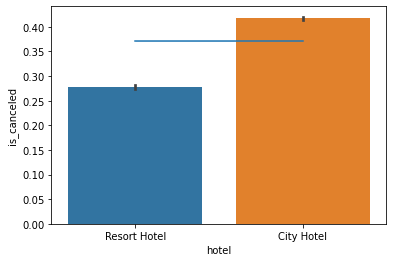

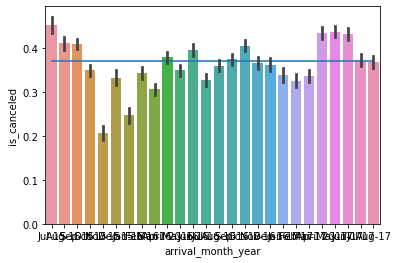

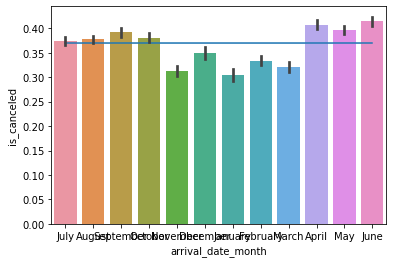

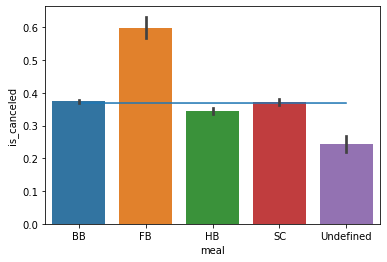

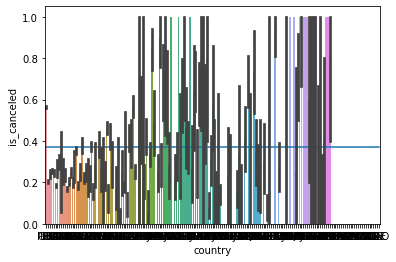

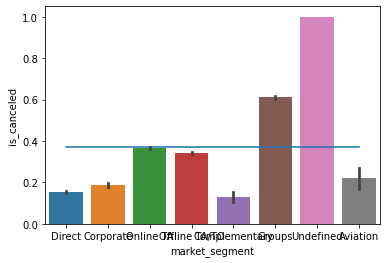

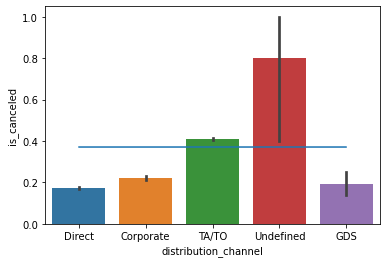

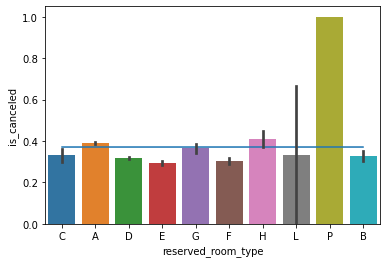

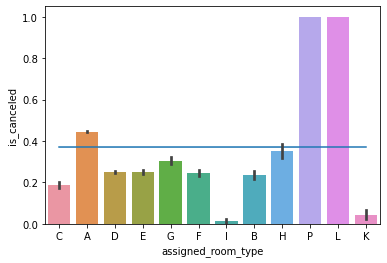

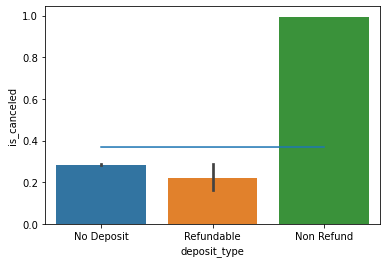

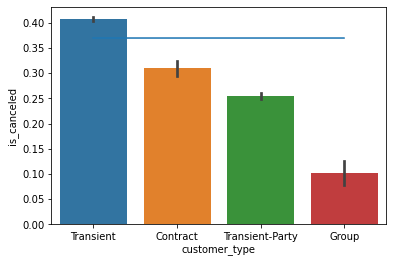

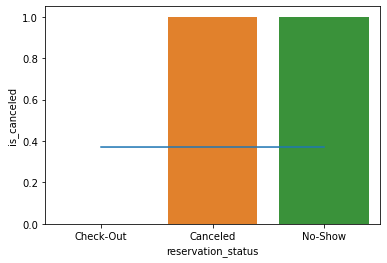

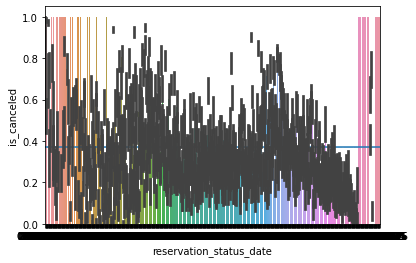

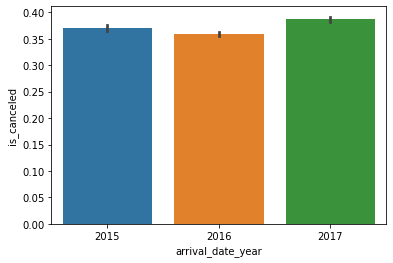

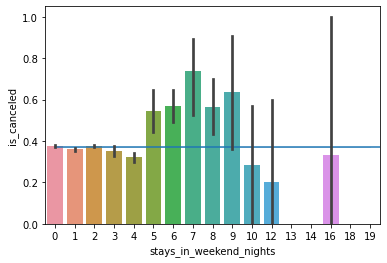

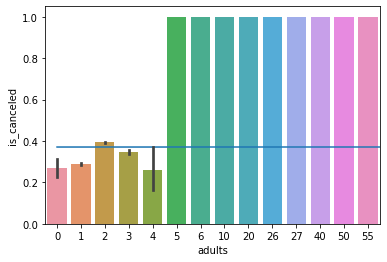

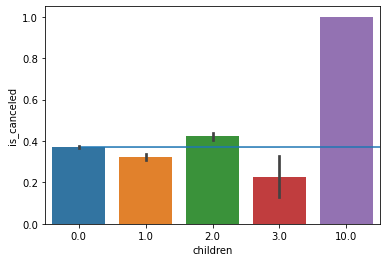

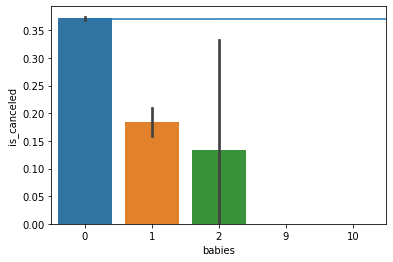

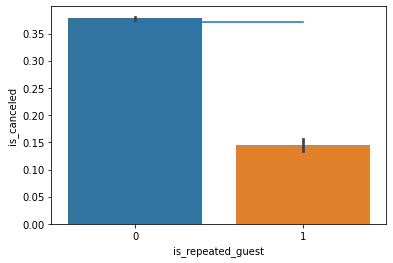

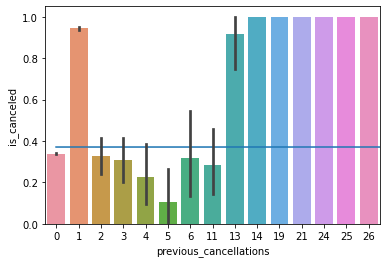

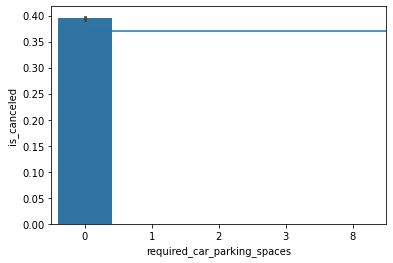

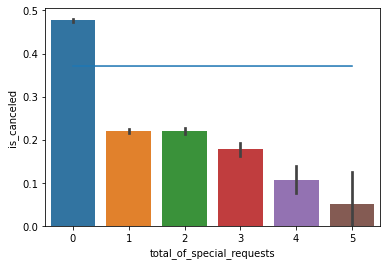

In [49]:
X_char_merged=pd.concat([Y,char1],axis=1,join='inner')

from numpy import mean
for col in (char1.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['is_canceled'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="is_canceled",data=X_char_merged, estimator=mean )
plt.show()

In [50]:
char2=char1.drop(['arrival_date_month','country','reserved_room_type','assigned_room_type','reservation_status',
                 'reservation_status_date','arrival_date_year'],axis=1)

In [51]:
char2.dtypes

hotel                          object
arrival_month_year             object
meal                           object
market_segment                 object
distribution_channel           object
deposit_type                   object
customer_type                  object
stays_in_weekend_nights        object
adults                         object
children                       object
babies                         object
is_repeated_guest              object
previous_cancellations         object
required_car_parking_spaces    object
total_of_special_requests      object
dtype: object

In [52]:
#char['default']=np.where(char['default'] =='unknown', 'yes', char['default']) #clubbing "yes" to "unknown"

In [53]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char2, drop_first = True)
X_char_dum.head()

,hotel_Resort Hotel,arrival_month_year_April 2017,arrival_month_year_Aug-15,arrival_month_year_Aug-16,arrival_month_year_Aug-17,arrival_month_year_Dec-15,arrival_month_year_Dec-16,arrival_month_year_Feb-16,arrival_month_year_Feb-17,arrival_month_year_Jan-16,...,previous_cancellations_26,required_car_parking_spaces_1,required_car_parking_spaces_2,required_car_parking_spaces_3,required_car_parking_spaces_8,total_of_special_requests_1,total_of_special_requests_2,total_of_special_requests_3,total_of_special_requests_4,total_of_special_requests_5
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
X_char_dum.shape

(119390, 107)

# Part 2 - Select K Best

In [55]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=100)
selector.fit_transform(X_char_dum, Y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [56]:
select_features_df_char.iloc[0]

hotel_Resort Hotel               1
arrival_month_year_April 2017    0
arrival_month_year_Aug-15        0
arrival_month_year_Aug-16        0
arrival_month_year_Dec-15        0
                                ..
total_of_special_requests_1      0
total_of_special_requests_2      0
total_of_special_requests_3      0
total_of_special_requests_4      0
total_of_special_requests_5      0
Name: 0, Length: 100, dtype: uint8

# Creating the Master Feature Set for Model Development

In [57]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [58]:
X_all.shape # char(100) + num(4) = 104 features

(119390, 104)

# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [60]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (83573, 104)
Shape of Testing Data (35817, 104)
Response Rate in Training Data is_canceled    0.370443
dtype: float64
Response Rate in Testing Data is_canceled    0.370355
dtype: float64


# Model Building Step

In [61]:
# Building a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [62]:
# Applying GridsearchCV to get best parameters

np.random.seed(60)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7, 9], 'min_samples_split': [50, 100, 150, 200, 250,300]}
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist, n_jobs = 3)
tree_grid.fit(X_train,y_train)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 9, 'min_samples_split': 50}


In [63]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=9,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=50, random_state=0)

In [64]:
# Building a Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=9,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=50, random_state=0)

In [65]:
#checking feature importance

feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
deposit_type_Non Refund,0.309301
lead_time,0.119098
previous_cancellations_1,0.090522
market_segment_Groups,0.072902
total_of_special_requests_1,0.051998
...,...
adults_50,0.000000
babies_10,0.000000
babies_9,0.000000
adults_55,0.000000


Here, Deposit type is the most important feature for our model

In [66]:
# Building a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=9,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=9, min_samples_split=50,
                           random_state=0)

In [67]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
deposit_type_Non Refund,0.419907
lead_time,0.116023
market_segment_Online TA,0.068436
agent,0.063822
previous_cancellations_1,0.060207
...,...
adults_5,0.000000
stays_in_weekend_nights_19,0.000000
stays_in_weekend_nights_18,0.000000
stays_in_weekend_nights_14,0.000000


Here also in case of GBM model, Deposit type is the most important feature for our model

# Model Evaluation

In [68]:
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [69]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [70]:
#calculating matrix by decision tree model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:",metrics.precision_score(y_test,y_pred_tree))
print("Recall:",metrics.recall_score(y_test,y_pred_tree))
print("f1_score:",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.8156462015244158
Precision: 0.8201037862771478
Recall: 0.6433471541650961
f1_score: 0.7210510751552531


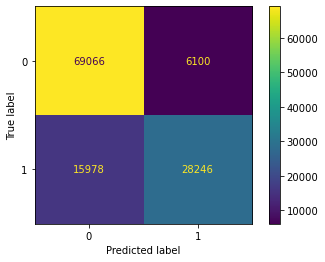

In [71]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [72]:
#calculating matrix by Random Forest model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test,y_pred_rf))
print("Recall:",metrics.recall_score(y_test,y_pred_rf))
print("f1_score:",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7725660998966971
Precision: 0.9951634745598762
Recall: 0.38778741047870335
f1_score: 0.5580991645871759


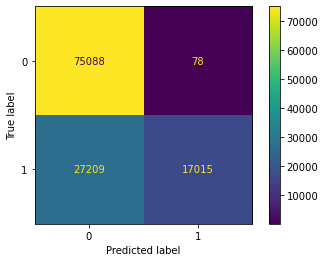

In [73]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [74]:
#calculating matrix by Gradient Boosting model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision:",metrics.precision_score(y_test,y_pred_gbm))
print("Recall:",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score:",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.8447943713878885
Precision: 0.8564951887490747
Recall: 0.6978514888805126
f1_score: 0.7690773896066132


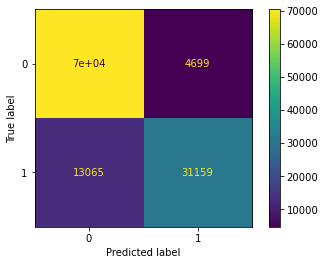

In [75]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [76]:
# Gains Chart Analysis
# This will help understand the power of discrimination offered by the model's estimated probabilities

> - Everything here is 50% probability, all are indicative results.Problem today is,people are looking at these metrics     and deciding the quality of the model, which is not the right way to look at the model!
- Because we are accepting that the only cutoff in the world which makes sense is 50% cutoff.
- Here cancellation rate is 37%, lets say model gives cancellation rate of 42% for any booking,so now confusion matrix and model will classify it as a non-cancellation class
- But we know, 42% > 37%, so anyone higher than 37% should be the one to go for cancellations, why using 50% then? 

- Its because we are doing .predict without realising what is happening behind it. That's why we will do Probability Decile analysis

In [77]:
gbm.predict_proba(X_all)

array([[0.93098904, 0.06901096],
       [0.81738109, 0.18261891],
       [0.84876302, 0.15123698],
       ...,
       [0.86631044, 0.13368956],
       [0.60596771, 0.39403229],
       [0.62855335, 0.37144665]])

In [78]:
# 1st column : probability of not cancelling
# 2nd column : probability of cancellation

'''2nd last customer's cancellation rate(39.4%) is higher than the average cancellation rate(37%), but he will be 
classified as non cancellation bcoz probability of non-cancellation is more than 50''' 

## Gradient Boosting - Gains Chart

In [79]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['is_canceled'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,11939,1.000000,0.996288,11939.0,11939.0,0.269967,0.269967,0.0,0.0,0.000000,0.000000,0.2700,0.1,0.1,1,2.699665
1,9,11939,0.919843,0.876858,10982.0,22921.0,0.248327,0.518293,957.0,957.0,0.012732,0.012732,0.5056,0.1,0.2,2,2.483267
2,8,11939,0.688249,0.635173,8217.0,31138.0,0.185804,0.704097,3722.0,4679.0,0.049517,0.062249,0.6418,0.1,0.3,3,1.858041
3,7,11939,0.446604,0.411521,5332.0,36470.0,0.120568,0.824665,6607.0,11286.0,0.087899,0.150148,0.6745,0.1,0.4,4,1.205680
4,6,11939,0.288801,0.296274,3448.0,39918.0,0.077967,0.902632,8491.0,19777.0,0.112963,0.263111,0.6395,0.1,0.5,5,0.779667
5,5,11939,0.174889,0.202929,2088.0,42006.0,0.047214,0.949846,9851.0,29628.0,0.131057,0.394168,0.5557,0.1,0.6,6,0.472142
6,4,11939,0.105034,0.136567,1254.0,43260.0,0.028356,0.978202,10685.0,40313.0,0.142152,0.536320,0.4419,0.1,0.7,7,0.283556
7,3,11939,0.055532,0.089967,663.0,43923.0,0.014992,0.993194,11276.0,51589.0,0.150015,0.686334,0.3069,0.1,0.8,8,0.149919
8,2,11939,0.023034,0.052823,275.0,44198.0,0.006218,0.999412,11664.0,63253.0,0.155177,0.841511,0.1579,0.1,0.9,9,0.062183
9,1,11939,0.002178,0.012259,26.0,44224.0,0.000588,1.000000,11913.0,75166.0,0.158489,1.000000,0.0000,0.1,1.0,10,0.005879


- N_events = how many cancelled out of 'count' column
- Actual_event_rate = N_events/count
- Predicted_event_rate = predicted by model
- We need to know where the discrimination b/w event and non event is getting maximised i.e KS
- KS = difference b/w cum_event and cum_nonevent
- KS should be maximized by 3rd decile(std)
- Here, KS is maximum at 4th decile(0.746495)

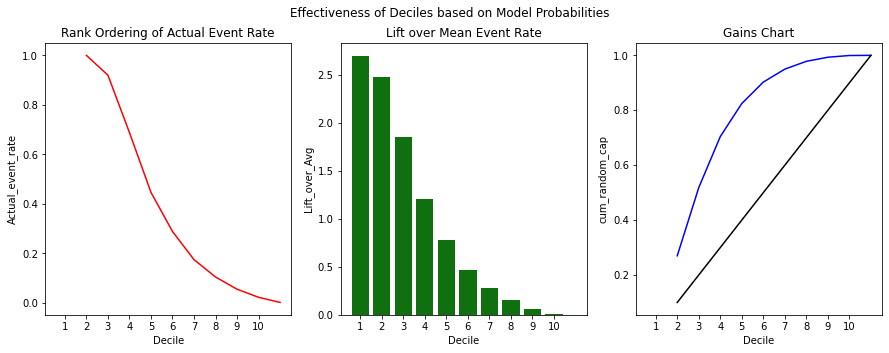

In [80]:
fig,axes = plt.subplots(1,3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')

sns.lineplot(ax=axes[0], x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1], x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],x="Decile", y="cum_random_cap", data=sorted_reindexed,color='black')

In [81]:
## Gains chart is not very strong, if it would have been started from 0.4 around, it would have been strong

Machine Learning Strategy ==> APT Framework
  - A - Audience
  - P - Prioritization
  - T - Treatment

### Audience

In [82]:
# creating target zones 
df['Predicted_cancel_Rank']=np.where(df['P_Rank_GBM']<8,"Bottom 7","Top 3")
df.Predicted_cancel_Rank.value_counts()

Bottom 7    83573
Top 3       35817
Name: Predicted_cancel_Rank, dtype: int64

In [83]:
df_top3=df.loc[df['Predicted_cancel_Rank']== 'Top 3',:]

In [84]:
df_top3.shape

(35817, 36)

In [107]:
df_top3.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,pred_prob_gbm,P_Rank_GBM,Predicted_cancel_Rank
8,Resort Hotel,1,85,Jul-15,2015,July,27,1,0,3,...,0,Transient,82.0,0,1,Canceled,06-05-2015,0.506571,8,Top 3
10,Resort Hotel,1,23,Jul-15,2015,July,27,1,0,4,...,0,Transient,123.0,0,0,Canceled,23-06-2015,0.575229,8,Top 3
11,Resort Hotel,0,35,Jul-15,2015,July,27,1,0,4,...,0,Transient,145.0,0,0,Check-Out,05-07-2015,0.620917,8,Top 3
28,Resort Hotel,0,77,Jul-15,2015,July,27,1,2,5,...,0,Transient,94.0,0,0,Check-Out,08-07-2015,0.659762,8,Top 3
45,Resort Hotel,1,47,Jul-15,2015,July,27,2,2,5,...,0,Transient,153.0,0,0,Canceled,02-06-2015,0.680656,8,Top 3


### Prioritization

For prioritization we have to create value matrix and engagement matrix.
  - for value matrix, we will use adr(avg daily rate)
  - for engagement matrix, we will use lead time(which shows inversely proportional relationship with engagement)

In [85]:
df['lead_time_RANK']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1

In [86]:
df.groupby('lead_time_RANK')['lead_time'].agg(['min','mean','max'])

,min,mean,max
lead_time_RANK,,,
1,0,0.652735,3
2,3,6.449703,11
3,11,18.337465,26
4,26,35.099757,45
5,45,56.680291,69
6,69,83.823603,99
7,99,117.566044,138
8,138,160.550130,184
9,184,219.433286,265


In [87]:
df.lead_time.mean()

104.01141636652986

   -> We can see that people with rank 7 and above have higher lead time than the avg lead time

In [94]:
#creating segments as High Lead time & Low Lead Time

df['lead_time_segment']=np.where(df['lead_time_RANK']>=7,"High Lead Time","Low Lead Time")
df.lead_time_segment.value_counts()

Low Lead Time     71634
High Lead Time    47756
Name: lead_time_segment, dtype: int64

In [95]:
df['adr_RANK']=pd.qcut(df['adr'].rank(method='first').values,10,duplicates='drop').codes+1

In [96]:
df.groupby('adr_RANK')['adr'].agg(['min','mean','max'])

,min,mean,max
adr_RANK,,,
1,-6.38,32.638938,50.00
2,50.00,59.250104,64.00
3,64.00,69.332909,75.00
4,75.00,79.526233,85.00
5,85.00,89.482808,94.56
6,94.59,99.285965,105.00
7,105.00,111.376652,118.15
8,118.15,125.793015,135.00
9,135.00,147.667347,164.00


In [97]:
df.adr.mean()

101.83112153446453

In [98]:
df['adr_segment']=np.where(df['adr_RANK']>=7,"High ADR","Low ADR")
df.adr_segment.value_counts()

Low ADR     71634
High ADR    47756
Name: adr_segment, dtype: int64

In [99]:
pd.crosstab(index=df['adr_segment'], columns=df['lead_time_segment'], values=df['adr'],aggfunc='mean')

lead_time_segment,High Lead Time,Low Lead Time
adr_segment,,
High ADR,141.203654,151.099370
Low ADR,74.960245,69.300239


Here, we can see High ADR with Low Lead Time are the best set of customers

In [100]:
pd.crosstab(index=df['adr_segment'], columns=df['lead_time_segment'], values=df['is_canceled'],aggfunc='mean')

lead_time_segment,High Lead Time,Low Lead Time
adr_segment,,
High ADR,0.482231,0.320037
Low ADR,0.528775,0.247969


 Here, we can see that Low ADR with High Lead Time cancels their booking most.

### Treatment

In [109]:
df_top3.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_month_year',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'pred_prob_gbm',
       'P_Rank_GBM', 'Predicted_cancel_Rank'],
      dtype='object')

In [104]:
#creating dataframe of list of services

service_list=['stays_in_weekend_nights','total_of_special_requests','reserved_room_type']

In [105]:
df_top3_services = df_top3[service_list]

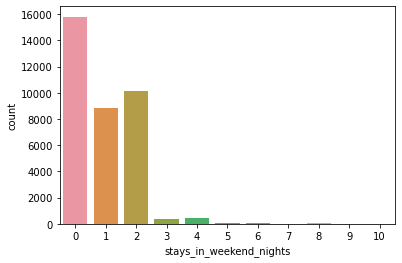

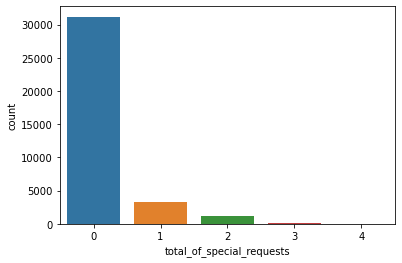

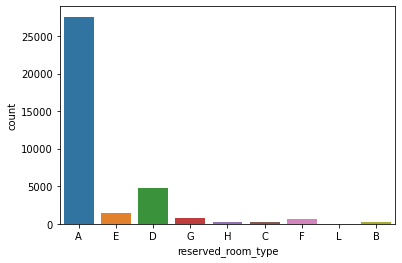

In [106]:
# check for what kind of service are customers using from top3 customers who are cancelling booking, 
# so that we can give some sort of treatment or discount on that services only:

for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col, data=df_top3_services)
plt.show()

Insights:
   - We can see that most of the customers are not weekend stayers(plot of 0 weekend is highest)
   - Majority of customers dont have special request, some customers opted for 1 or 2 special requests, so hotel can decide whether to cater to those services or not
   - Reserved_room_type 'A' customers have cancelled largely, so 'A' is an issue, and 'D' also to some extent